In [64]:
# Detección y Reconocimiento de Caras

# Importamos las librerias necesarias
import cv2 # Importamos OpenCV para procesamiento de imagenes
import numpy as np # Numpy para manejar arrays
import matplotlib.pyplot as plt # Matplotlib para visualización
from google.colab.patches import cv2_imshow # Importamos funcion para mostrar imagenes en Colab

In [65]:
#1.- Descargue las clasificaciones en cascada pre-entrenados para  deteccion facial
# Estos son archivos XML con patrones pre-entrenados para detección
!wget -O haarcascade_frontalface_default.xml https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget -O haarcascade_eye.xml https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml

--2025-10-06 23:12:02--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2025-10-06 23:12:02--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2025

In [66]:
# Cargar clasificadores cascada
# Cargamos el clasificador para rostros frontales
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Cargamos la clasificación para los ojos
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

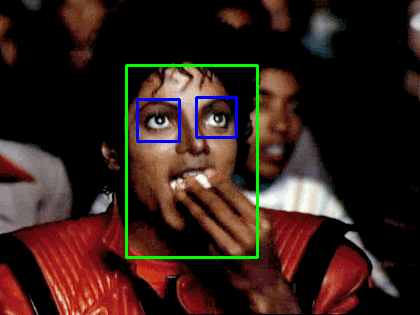

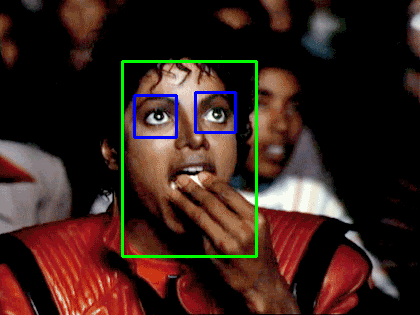

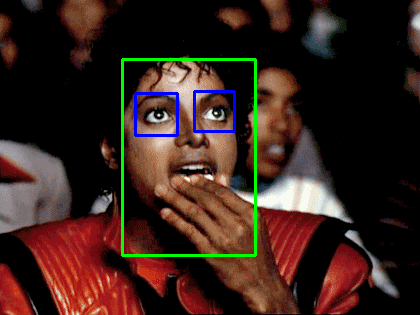

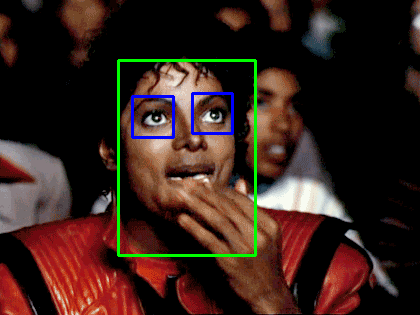

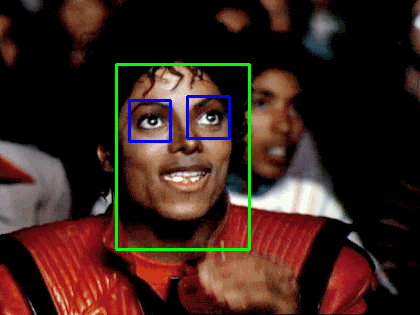

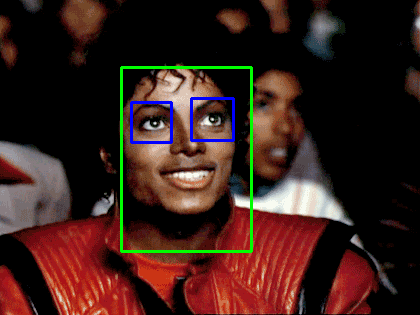

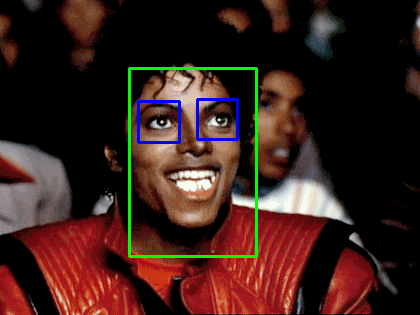

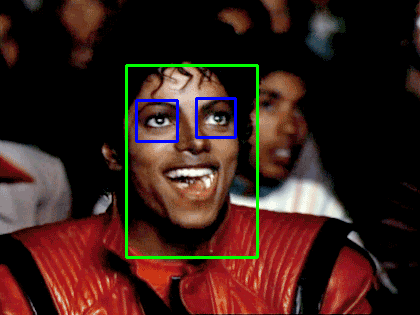

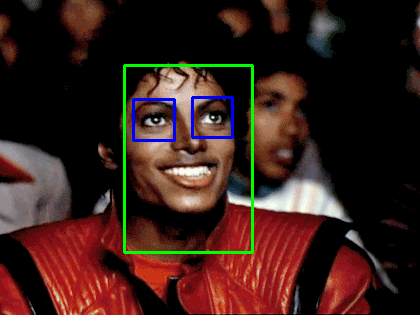

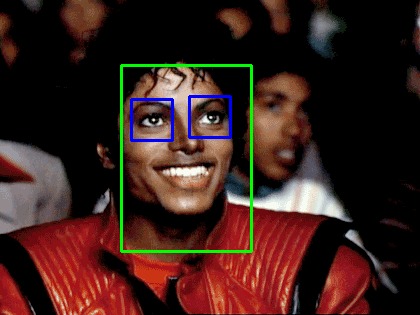

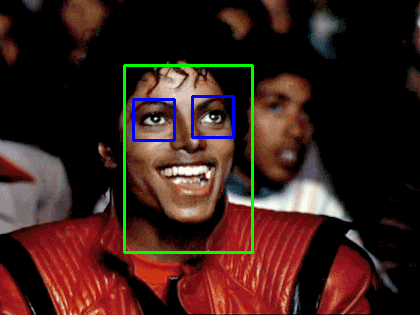

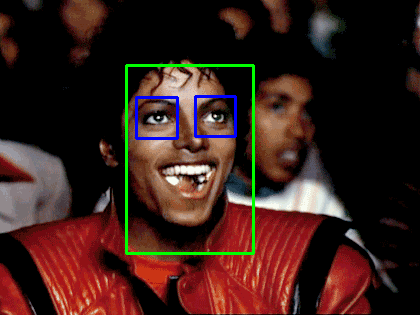

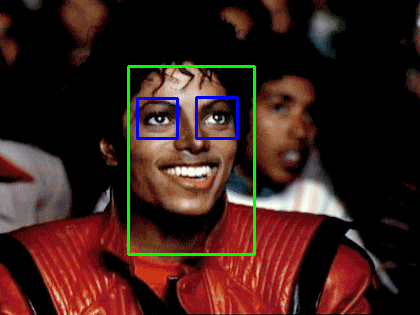

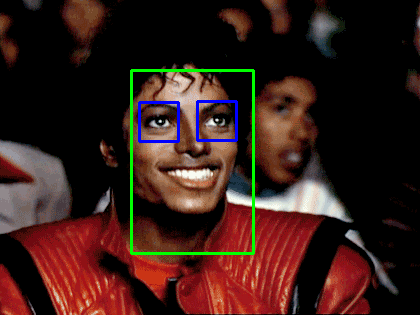

In [67]:
# Poner Link del Video
video_path = "/content/michael.gif"
cap = cv2.VideoCapture(video_path)

# Procesar cuadro a cuadro
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detección de rostros
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.05, # reducirlo (1.05 o 1.03 mejora precisión, pero lento
        minNeighbors=30,  # Reduce falsos positivos al aumentar
        minSize=(30, 30)  # Aumentar si buscamos caras grandes
    )

    for (x, y, u, h) in faces:
        # Dibujar rectángulo verde para el rostro
        cv2.rectangle(frame, (x, y), (x+u, x+h), (0, 255, 0), 2)

        roi_gray = gray[y:y + h, x:x + u]
        roi_color = frame[y:y + h, x:x + u]

        # Detección de ojos dentro del rostro
        eyes = eye_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.04,
            minNeighbors=7,
            minSize=(30, 30)
        )

        for (ex, ey, eu, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + eu, ey + eh), (255, 0, 0), 2)

    # Mostrar cuadro procesado
    cv2_imshow(frame)
